In [1]:
import tensorflow as tf
import numpy as np
import pickle

In [4]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\input_layer_4_6_13_2.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)

x_train = input_data[:100000,:]
x_valid = input_data[100000:102500, :]
x_test = input_data[102500:,:]



(105000, 24)


In [5]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\output_layer_4_6_13_2.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
y_train = output_data[:100000,:]
y_valid = output_data[100000:102500, :]
y_test = output_data[102500:,:]
print(output_data.shape)

(105000, 12)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300,input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2,validation_data = (x_valid, y_valid))


Train on 100000 samples, validate on 2500 samples
Epoch 1/100
100000/100000 - 5s - loss: 0.3809 - accuracy: 0.8452 - val_loss: 0.2710 - val_accuracy: 0.8852
Epoch 2/100
100000/100000 - 4s - loss: 0.2341 - accuracy: 0.8979 - val_loss: 0.2113 - val_accuracy: 0.9063
Epoch 3/100
100000/100000 - 4s - loss: 0.1942 - accuracy: 0.9129 - val_loss: 0.1854 - val_accuracy: 0.9161
Epoch 4/100
100000/100000 - 4s - loss: 0.1774 - accuracy: 0.9196 - val_loss: 0.1744 - val_accuracy: 0.9208
Epoch 5/100
100000/100000 - 3s - loss: 0.1694 - accuracy: 0.9230 - val_loss: 0.1688 - val_accuracy: 0.9231
Epoch 6/100
100000/100000 - 3s - loss: 0.1605 - accuracy: 0.9276 - val_loss: 0.1609 - val_accuracy: 0.9281
Epoch 7/100
100000/100000 - 3s - loss: 0.1511 - accuracy: 0.9320 - val_loss: 0.1471 - val_accuracy: 0.9332
Epoch 8/100
100000/100000 - 3s - loss: 0.1397 - accuracy: 0.9365 - val_loss: 0.1357 - val_accuracy: 0.9369
Epoch 9/100
100000/100000 - 4s - loss: 0.1266 - accuracy: 0.9413 - val_loss: 0.1225 - val_accu

Epoch 77/100
100000/100000 - 3s - loss: 0.0196 - accuracy: 0.9927 - val_loss: 0.0401 - val_accuracy: 0.9863
Epoch 78/100
100000/100000 - 3s - loss: 0.0189 - accuracy: 0.9929 - val_loss: 0.0470 - val_accuracy: 0.9851
Epoch 79/100
100000/100000 - 3s - loss: 0.0196 - accuracy: 0.9926 - val_loss: 0.0453 - val_accuracy: 0.9854
Epoch 80/100
100000/100000 - 3s - loss: 0.0200 - accuracy: 0.9925 - val_loss: 0.0340 - val_accuracy: 0.9881
Epoch 81/100
100000/100000 - 3s - loss: 0.0199 - accuracy: 0.9926 - val_loss: 0.0407 - val_accuracy: 0.9867
Epoch 82/100
100000/100000 - 3s - loss: 0.0199 - accuracy: 0.9926 - val_loss: 0.0452 - val_accuracy: 0.9854
Epoch 83/100
100000/100000 - 3s - loss: 0.0179 - accuracy: 0.9934 - val_loss: 0.0347 - val_accuracy: 0.9886
Epoch 84/100
100000/100000 - 3s - loss: 0.0162 - accuracy: 0.9939 - val_loss: 0.0409 - val_accuracy: 0.9861
Epoch 85/100
100000/100000 - 3s - loss: 0.0189 - accuracy: 0.9931 - val_loss: 0.0480 - val_accuracy: 0.9852
Epoch 86/100
100000/100000 -

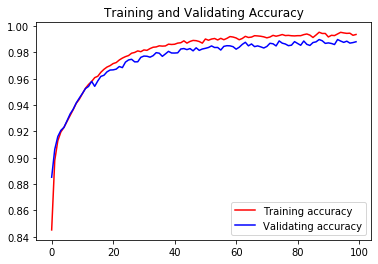

In [8]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()
plt.show()

In [9]:
model.evaluate(x_test, y_test, verbose = 2)

2500/1 - 0s - loss: 0.0361 - accuracy: 0.9873


[0.05005541704893112, 0.9873]

In [10]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\Min_Max_4_6_13_2_model.h5')